<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Particles001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

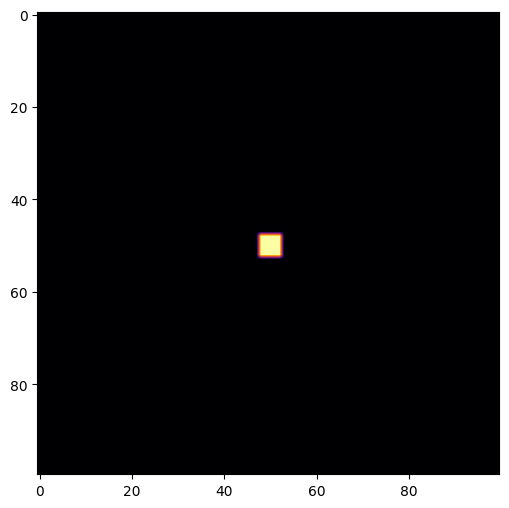

In [3]:
# HES Particle Emergence Simulation v2
# Simulates entropy gradient, curvature emergence, and particle-like excitation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
size = 100  # lattice size
steps = 100  # number of time steps
mu_E_strength = 5.0  # initial entropy gradient strength
decay = 0.95  # memory decay factor

# Initialize entropy and memory fields
entropy = np.zeros((size, size))
memory = np.zeros_like(entropy)

# Seed entropy gradient at center
cx, cy = size // 2, size // 2
entropy[cx-2:cx+3, cy-2:cy+3] = mu_E_strength

# Setup plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(entropy, cmap='inferno', interpolation='bilinear')
contour = None

def update(frame):
    global entropy, memory, contour
    ax.clear()

    # Compute curvature from entropy gradients
    grad_x = np.roll(entropy, -1, axis=0) - np.roll(entropy, 1, axis=0)
    grad_y = np.roll(entropy, -1, axis=1) - np.roll(entropy, 1, axis=1)
    curvature = np.sqrt(grad_x**2 + grad_y**2)

    # Update entropy and memory
    entropy += curvature * 0.1
    memory = decay * memory + curvature

    # Detect particle-like excitation
    particle_mask = memory > np.percentile(memory, 99)

    # Plot entropy field
    ax.set_title(f"Step {frame}")
    im = ax.imshow(entropy, cmap='inferno', interpolation='bilinear')

    # Overlay particle contour
    contour = ax.contour(particle_mask, colors='cyan', linewidths=0.5)

anim = animation.FuncAnimation(fig, update, frames=steps, interval=100)
plt.show()

